In [7]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

import warnings as wg
wg.filterwarnings("ignore")

In [8]:
#Reading data from url
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
print("Data imported successfully")

data.describe()

Data imported successfully


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:

data.shape

(25, 2)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


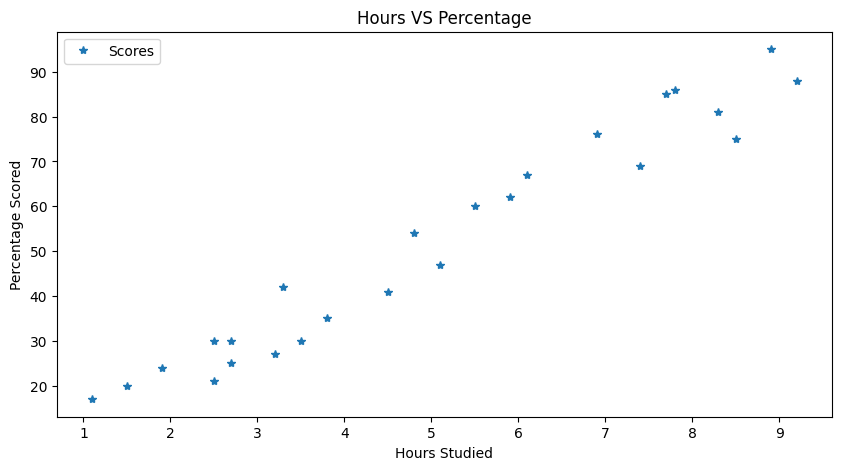

In [48]:
plt.rcParams["figure.figsize"]=[10,5]
data.plot(x="Hours",y="Scores",style="*")
plt.title("Hours VS Percentage")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [20]:
x=data.iloc[:,:1].values
y=data.iloc[:,1:].values
print(x,y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [83]:
x =  data['Hours']
y = data['Scores']
print(x,y)

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64 0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

In [22]:
# x_train.reshape(-1,1)
# y_train.reshape(-1,1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(20, 1) (5, 1) (20, 1) (5, 1)


In [23]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training Complete")

Training Complete


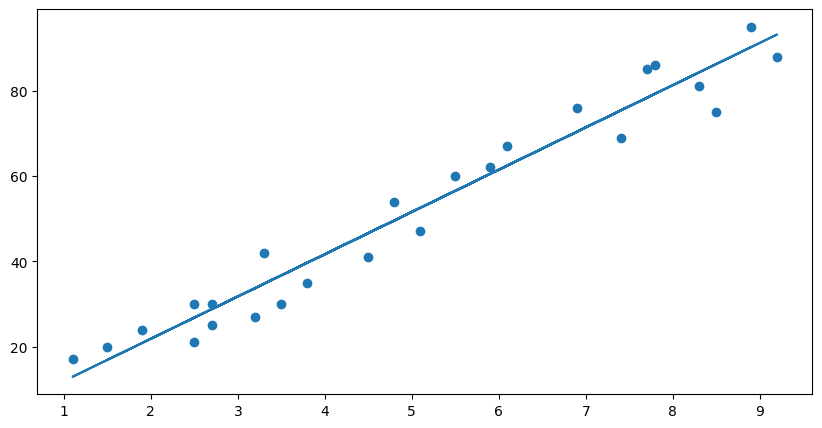

In [49]:
#Plot Regression Line
line=regressor.coef_*x+regressor.intercept_

#Plotting the Test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [25]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [34]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [35]:
df=pd.DataFrame({'Actual':[y_test],'Predited':[y_pred]})
df

,Actual,Predited
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [36]:
hours= 9.25
my_pred=regressor.predict([[hours]])
print('No of hours={}'.format(hours))
print("Percentage Scored = {}".format(my_pred[0]))



No of hours=9.25
Percentage Scored = [93.69173249]


In [41]:
from  sklearn.metrics import r2_score,mean_absolute_error
r2_accuracy=r2_score(y_test,y_pred)
r2_accuracy

0.9454906892105354

In [43]:
mae=mean_absolute_error(y_test,y_pred)
mae

4.183859899002982